In [1]:
import pandas as pd
from pymongo import MongoClient
from sklearn.decomposition import NMF
from sklearn.metrics import mean_squared_error
from  sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import numpy as np

In [2]:
try:
    start = time.time()
    # Connexion à MongoDB
    client = MongoClient("mongodb://localhost:27017/")
    db = client["pradel"]
    movies = db["movie"]
    users = db["user"]
    end = time.time()
    print('Connecté à la bdd en:' + str(end - start))
except:
    print("erreur de la connection mongo")
    # raise HTTPException(status_code=500)


Connecté à la bdd en:0.08298802375793457


In [4]:
# formatage des genres 

# for movie_id in movies.distinct('_id'):
#     # Mise à jour de chaque document
#     movies.update_one(
#         {"_id": movie_id},
#         {"$set": {"genres": movies.find_one({"_id": movie_id})['genres'].split('|')}}
#     )

AttributeError: 'list' object has no attribute 'split'

In [5]:
categorie=movies.distinct(key="genres")
print(len(categorie))
print(categorie)

18
['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']


In [6]:
for cat in categorie : 
    print (cat,movies.count_documents({'genres':cat}))

Action 503
Adventure 283
Animation 104
Children's 251
Comedy 1200
Crime 211
Documentary 127
Drama 1603
Fantasy 68
Film-Noir 44
Horror 343
Musical 114
Mystery 106
Romance 471
Sci-Fi 276
Thriller 492
War 143
Western 68


In [7]:
def attribut_color(id_film,list_genre):

    color_id={}

    for x in id_film : 

        cat=movies.find_one({'_id':x})

        if list_genre [0] in cat['genres'] and list_genre[1] in cat['genres']   :
            color_id[x]='red'
        elif list_genre [0] in cat['genres']  :
            color_id[x]='yellow'
        elif list_genre[1] in cat['genres']:
            color_id[x]='black'
        else : 
            color_id[x]='brown'

    return color_id


In [8]:
def wiew (binome):
    
    _id=[ s['_id'] for s in movies.find({'genres':{'$in':binome}})]
    users_ids =users.distinct('_id')
    data = pd.DataFrame(0, index=users_ids, columns=_id)

    for u_id in users_ids:
        user = users.find_one({'_id': u_id})

        for m in user['movies']:
            
            m_id = m['movieid']
            rating = m['rating']

            if m_id in _id:
                data.loc[u_id, m_id] = rating

    df=data
    df = df[df.sum(axis=1) > 0]
    df_sparse = df.astype(pd.SparseDtype("float", 0))

    nmf = NMF(n_components=2)

    # Fit the model to the user-item matrix
    W = nmf.fit_transform(df_sparse)  # User matrix
    H = nmf.components_  # Item matrix

    pred_matrix = np.dot(W, H)

    print(mean_squared_error(df_sparse.values, pred_matrix))

    color=attribut_color(_id,["Children's",'Horror'])

    plt.scatter(nmf.components_[0, :], nmf.components_[1, :],c=color.values())

0.5250298047102786


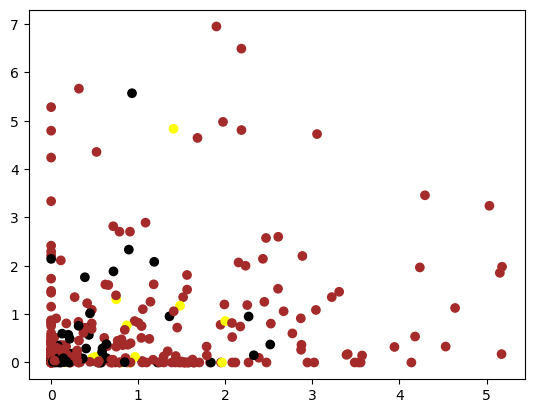

In [9]:
wiew(['Sci-Fi','Documentary'])


In [10]:
#liste des films qui sont dans Horror ou Children's
movies.find({'genres':{'$in':["Children's",'Horror' ]}})


In [11]:
#nombre de films concerné
movies.count_documents({'genres':{'$in':["Children's",'Horror' ]}})


593

In [12]:
# id films concerné
_id=[ s['_id'] for s in movies.find({'genres':{'$in':["Children's",'Horror' ]}})]


In [13]:
_id

[1,
 2,
 8,
 12,
 13,
 34,
 48,
 54,
 56,
 60,
 70,
 87,
 107,
 126,
 146,
 152,
 158,
 169,
 177,
 181,
 188,
 196,
 220,
 238,
 239,
 241,
 244,
 250,
 253,
 258,
 262,
 273,
 285,
 311,
 313,
 317,
 328,
 330,
 332,
 343,
 355,
 362,
 364,
 366,
 374,
 382,
 392,
 397,
 407,
 421,
 426,
 455,
 484,
 502,
 512,
 531,
 532,
 546,
 551,
 558,
 565,
 569,
 575,
 577,
 586,
 588,
 594,
 595,
 596,
 606,
 609,
 610,
 611,
 616,
 631,
 661,
 673,
 709,
 711,
 724,
 735,
 742,
 754,
 755,
 775,
 783,
 799,
 801,
 808,
 810,
 828,
 837,
 841,
 842,
 879,
 881,
 885,
 888,
 891,
 917,
 919,
 968,
 986,
 1005,
 1007,
 1009,
 1010,
 1011,
 1012,
 1013,
 1014,
 1015,
 1016,
 1017,
 1018,
 1019,
 1021,
 1022,
 1023,
 1024,
 1025,
 1026,
 1028,
 1029,
 1030,
 1031,
 1032,
 1033,
 1064,
 1073,
 1097,
 1105,
 1128,
 1130,
 1168,
 1205,
 1214,
 1215,
 1219,
 1241,
 1255,
 1258,
 1261,
 1278,
 1282,
 1320,
 1321,
 1322,
 1323,
 1324,
 1325,
 1326,
 1327,
 1328,
 1329,
 1330,
 1331,
 1332,
 1333,
 1334

In [14]:
#  user qui ont evaluer des films de la liste
# users.find({'movies.movieid':{'$in':_id}})

In [15]:
# nombre d'utilisateur concerné
# users.count_documents({'movies.movieid':{'$in':_id}})

In [16]:
users_ids =users.distinct('_id')
data = pd.DataFrame(0, index=users_ids, columns=_id)
data

,1,2,8,12,13,34,48,54,56,60,...,3931,3932,3933,3935,3938,3939,3940,3941,3942,3945
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
for u_id in users_ids:
    user = users.find_one({'_id': u_id})

    for m in user['movies']:
        
        m_id = m['movieid']
        rating = m['rating']

        if m_id in _id:
            data.loc[u_id, m_id] = rating

In [18]:
data

,1,2,8,12,13,34,48,54,56,60,...,3931,3932,3933,3935,3938,3939,3940,3941,3942,3945
1,5,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0,0,0,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6037,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6039,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df=data

In [20]:
df = df[df.sum(axis=1) > 0]
df_sparse = df.astype(pd.SparseDtype("float", 0))


In [21]:
df

,1,2,8,12,13,34,48,54,56,60,...,3931,3932,3933,3935,3938,3939,3940,3941,3942,3945
1,5,0,0,0,0,0,5,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,4,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,0,0,0,0,0,5,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6037,0,0,0,0,0,3,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6039,0,0,0,0,0,0,3,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:

nmf = NMF(n_components=2)

# Fit the model to the user-item matrix
W = nmf.fit_transform(df_sparse)  # User matrix
H = nmf.components_  # Item matrix

pred_matrix = np.dot(W, H)

print(mean_squared_error(df_sparse.values, pred_matrix))

0.35627635115190476


In [23]:
color_id={}
for x in _id : 
    cat=movies.find_one({'_id':x})
    print(cat)

{'_id': 1, 'title': 'Toy Story (1995)', 'genres': ['Animation', "Children's", 'Comedy'], 'year': {'match': '(1995)', 'idx': 10, 'captures': []}}
{'_id': 2, 'title': 'Jumanji (1995)', 'genres': ['Adventure', "Children's", 'Fantasy'], 'year': {'match': '(1995)', 'idx': 8, 'captures': []}}
{'_id': 8, 'title': 'Tom and Huck (1995)', 'genres': ['Adventure', "Children's"], 'year': {'match': '(1995)', 'idx': 13, 'captures': []}}
{'_id': 12, 'title': 'Dracula: Dead and Loving It (1995)', 'genres': ['Comedy', 'Horror'], 'year': {'match': '(1995)', 'idx': 28, 'captures': []}}
{'_id': 13, 'title': 'Balto (1995)', 'genres': ['Animation', "Children's"], 'year': {'match': '(1995)', 'idx': 6, 'captures': []}}
{'_id': 34, 'title': 'Babe (1995)', 'genres': ["Children's", 'Comedy', 'Drama'], 'year': {'match': '(1995)', 'idx': 5, 'captures': []}}
{'_id': 48, 'title': 'Pocahontas (1995)', 'genres': ['Animation', "Children's", 'Musical', 'Romance'], 'year': {'match': '(1995)', 'idx': 11, 'captures': []}}
{

In [24]:
color_id={}
for x in _id : 
    cat=movies.find_one({'_id':x})

    if "Children's"  in cat['genres'] and 'Horror' in cat['genres']   :
        color_id[x]='red'
    elif "Children's" in cat['genres']  :
        color_id[x]='yellow'
    elif 'Horror' in cat['genres']:
        color_id[x]='black'
    else : 
        color_id[x]='brown'



In [25]:
def attribut_color(id_film,list_genre):

    color_id={}

    for x in id_film : 

        cat=movies.find_one({'_id':x})

        if list_genre [0] in cat['genres'] and list_genre[1] in cat['genres']   :
            color_id[x]='red'
        elif list_genre [0] in cat['genres']  :
            color_id[x]='yellow'
        elif list_genre[1] in cat['genres']:
            color_id[x]='black'
        else : 
            color_id[x]='brown'

    return color_id



In [26]:
color=attribut_color(_id,["Children's",'Horror'])

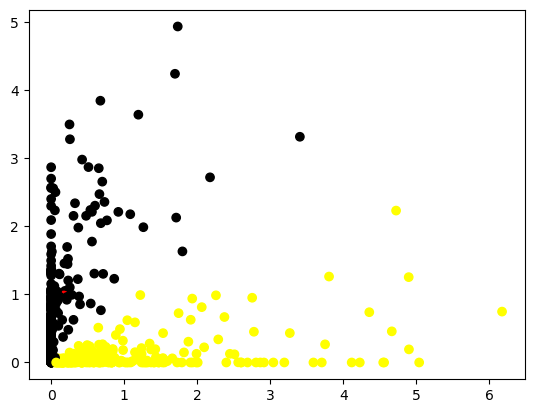

In [27]:
plt.scatter(nmf.components_[0, :], nmf.components_[1, :],c=color.values())

In [28]:
movies_ids=movies.distinct('_id')
users_ids =users.distinct('_id')
data = pd.DataFrame(0, index=users_ids, columns=movies_ids)

for u_id in users_ids:
    user = users.find_one({'_id': u_id})

    for m in user['movies']:
        
        m_id = m['movieid']
        rating = m['rating']

        if m_id in _id:
            data.loc[u_id, m_id] = rating

df=data
# df = df[df.sum(axis=1) > 0]
df_sparse = df.astype(pd.SparseDtype("float", 0))

nmf = NMF(n_components=18)


In [29]:
X_train, X_test = train_test_split(df_sparse, test_size=0.2, random_state=42)

# Fit the model to the user-item matrix
W = nmf.fit_transform(X_train.values)  # User matrix
H = nmf.components_  # Item matrix

# Appliquez la NMF sur l'ensemble de test (si nécessaire)
nmf_result_test = nmf.transform(X_test.values)

In [30]:
pred_matrix = np.dot(W,H)
print(mean_squared_error(pred_matrix, X_train.values))

0.03881199855622419


In [31]:
predicted_df_test = pd.DataFrame(pred_matrix, columns=df_sparse.columns)
predicted_df_test

,1,2,3,4,5,6,7,8,9,10,...,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952
0,0.009726,0.062478,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.016784,0.0,0.0,...,0.0,0.0,0.011861,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.006644,0.024074,0.0,0.0,0.0,0.0,0.0,0.005742,0.0,0.0,...,0.0,0.0,0.002260,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.116988,0.367571,0.0,0.0,0.0,0.0,0.0,0.059206,0.0,0.0,...,0.0,0.0,0.009295,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.070427,0.584820,0.0,0.0,0.0,0.0,0.0,0.007419,0.0,0.0,...,0.0,0.0,0.009749,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4827,3.919547,1.559396,0.0,0.0,0.0,0.0,0.0,0.270202,0.0,0.0,...,0.0,0.0,0.045648,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4828,0.019500,0.024576,0.0,0.0,0.0,0.0,0.0,0.008203,0.0,0.0,...,0.0,0.0,0.001748,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4829,0.104966,0.482767,0.0,0.0,0.0,0.0,0.0,0.044376,0.0,0.0,...,0.0,0.0,0.007713,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4830,0.007316,0.025581,0.0,0.0,0.0,0.0,0.0,0.007579,0.0,0.0,...,0.0,0.0,0.001003,0.0,0.0,0.0,0.0,0.0,0.0,0.0
